# Programming for Data Science and Artificial Intelligence

## 4 Matplotlib

### Readings: 
- [VANDER] Ch4
- https://matplotlib.org/3.2.2/contents.html

Matplotlib is a data visualization library built on NumPy arrays.  It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line. One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. 

Recent Matplotlib versions make it relatively easy to set new global plotting styles, and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn, ggpy, HoloViews, Altair, and even Pandas itself can be used as wrappers around Matplotlib's API. Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.


### Importing Matplotlib

In [1]:
import matplotlib.pyplot as plt

### Setting Styles

In [2]:
# Use plt.style.use() to choose appropriate aesthetic styles.
plt.style.use('seaborn-whitegrid')

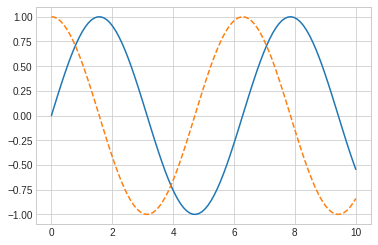

In [3]:
# now the plot will embed a PNG image of the resulting graphic
import numpy as np
x   = np.linspace(0, 10, 100)
fig = plt.figure()

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

## MATLAB-style

'\n- important to note that this api is stateful.  plt is a global variable\nthat keep track of all figure and axes.  One potential problem is that\nit is difficult to edit the first figure once you come to the second figure\nsince the pointer has already pointed to the second plot\n'

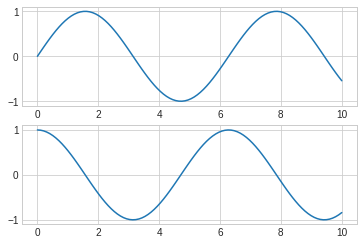

In [4]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1)  #(row, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

'''
- important to note that this api is stateful.  plt is a global variable
that keep track of all figure and axes.  One potential problem is that
it is difficult to edit the first figure once you come to the second figure
since the pointer has already pointed to the second plot
'''

### Simple Line Plots

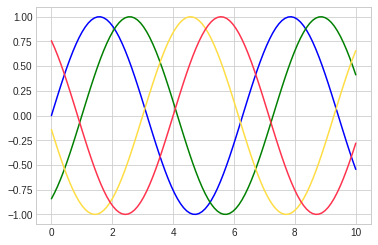

In [5]:
# Color Options
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1

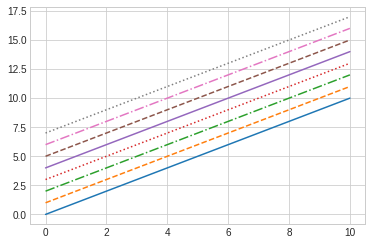

In [6]:
# Line Options
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':'); # dotted

# check help(plt.plot)  for all possible styles

(-1.5, 1.5)

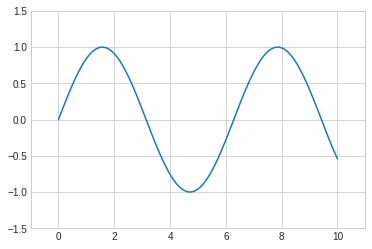

In [7]:
# Plot x y limits
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5) # you can also reverse!

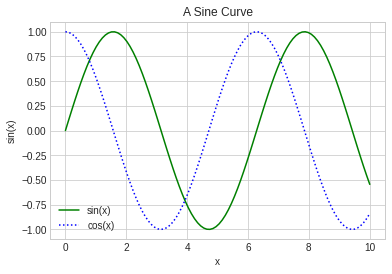

In [8]:
# Labeling
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.title("A Sine Curve")
plt.legend()
plt.xlabel("x")
plt.ylabel("sin(x)");

### Scatter plots

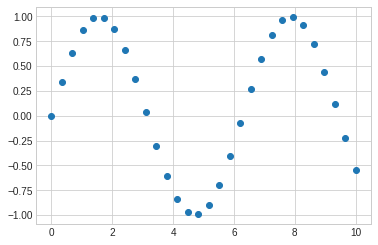

In [10]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.scatter(x, y, marker='o')

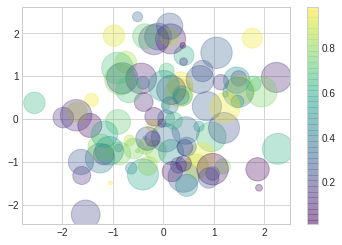

In [11]:
# The primary difference of plt.scatter from plt.plot is that it can 
# be used to create scatter plots where the properties of each individual 
# point (size, face color, edge color, etc.) can be individually 
# controlled or mapped to data.
# plt can also accept x, and y in the form of (n, ), also s = (n, )
rng = np.random.RandomState(0)
x   = rng.randn(100)
x.shape  #shape of (n, )
y   = rng.randn(100)
colors = rng.rand(100)
sizes  = 1000 * rng.rand(100)

# print(x, y, sizes)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()  # show color scale

### Errorbars

<ErrorbarContainer object of 3 artists>

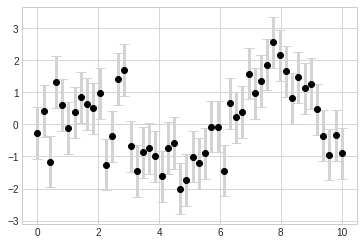

In [12]:
# use plt.errorbar
x  = np.linspace(0, 10, 50)
dy = 0.8
y  = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='ok', ecolor='lightgray',
            elinewidth=3, capsize=5)  # capsize is the bar on top and bot

### Annotation

Text(3, 6, 'curve up')

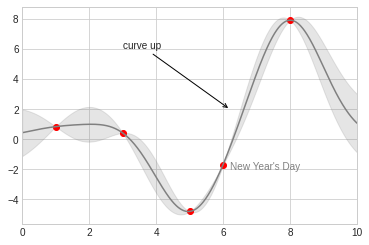

In [13]:
### Continuous errors
# Let's say you plot a line, and you would like to know the areas of 
# errors.  Use fill_between()

from sklearn.gaussian_process import GaussianProcessRegressor as GP

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GP().fit(xdata[:, np.newaxis], ydata)

xfit        = np.linspace(0, 10, 1000)
yfit, sigma = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit       = 1.96 * sigma  # 95% confidence region

# Visualize the result
plt.plot(xdata, ydata, 'or')  #red circle
plt.plot(xfit, yfit, '-', color='gray')   #fitted by guassian

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10)

# add labels to the plot
style = dict(size = 10, color='gray')
plt.text(6.2, -2, "New Year's Day", **style)  #can simply put color
plt.annotate('curve up', xy=(6.2, 2), xytext=(3, 6),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))

# there are many plot styles!
# publish-ready without any photoshop touch!  cool right?
# https://matplotlib.org/3.2.1/tutorials/text/annotations.html


### Histograms

(array([ 1.,  1.,  2.,  3.,  4.,  3., 11., 22., 30., 42., 64., 62., 68.,
        68., 89., 86., 77., 85., 75., 60., 47., 30., 28., 16.,  7., 12.,
         3.,  1.,  1.,  2.]),
 array([-3.42843257, -3.20695042, -2.98546828, -2.76398613, -2.54250398,
        -2.32102183, -2.09953969, -1.87805754, -1.65657539, -1.43509324,
        -1.2136111 , -0.99212895, -0.7706468 , -0.54916465, -0.32768251,
        -0.10620036,  0.11528179,  0.33676394,  0.55824608,  0.77972823,
         1.00121038,  1.22269253,  1.44417467,  1.66565682,  1.88713897,
         2.10862112,  2.33010327,  2.55158541,  2.77306756,  2.99454971,
         3.21603186]),
 <a list of 30 Patch objects>)

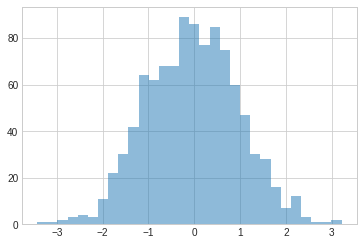

In [14]:
# A simple histogram can be a great first step in understanding a dataset. 
data = np.random.normal(0, 1, 1000)  # 1000 numbers between [0, 1)
plt.hist(data, bins=30, alpha=0.5)  # x should be in the shape of (n, )

### Multiple subplots

plt subplot takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

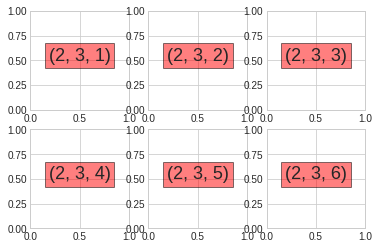

In [15]:
# matlab style
for i in range(1, 7):
    plt.subplot(2, 3, i)
    # plt.text (x, y, string) (0, 0) lower left to (1, 1) upper right
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, horizontalalignment='center',
             bbox=dict(facecolor='red', alpha=0.5))

### 3D Plotting

We can enable 3D plotting by importing the <code>mplot3d</code> library, which comes with your standard Matplotlib installation via pip. Just be sure that your Matplotlib version is over 1.0.
Once this sub-module is imported, 3D plots can be created by passing the keyword <code>projection="3d"</code> to any of the regular axes creation functions in Matplotlib:

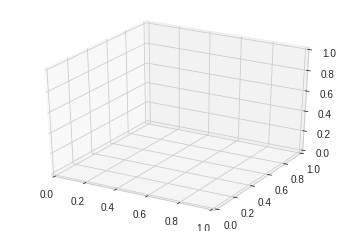

In [16]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax  = plt.axes(projection="3d")

plt.show()

The 3D plotting functions are quite intuitive: instead of just scatter we call scatter3D , and instead of passing only x and y data, we pass over x, y, and z. All of the other function settings such as colour and line type remain the same as with the 2D plotting functions.

#### 3D Scatter and Line Plots

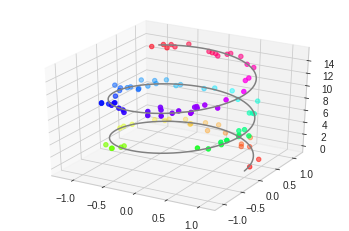

In [17]:
fig = plt.figure()
ax  = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

### Date Tick Labels

You can use <code>.set_major_locator</code>, <code>.set_major_formatter</code>, <code>.set_minor_locator</code> to format the ticks

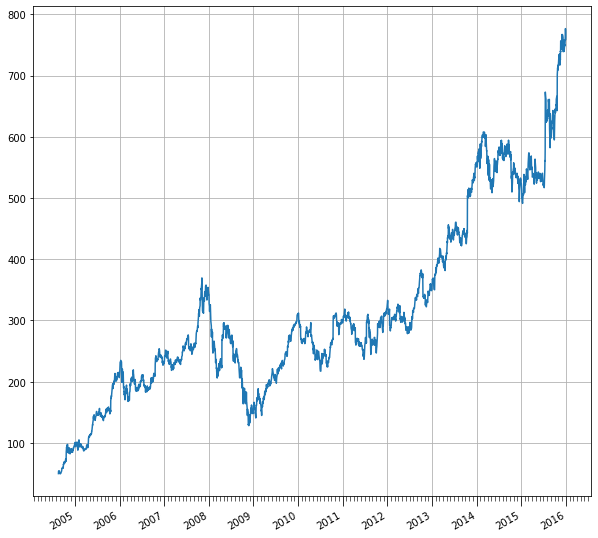

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams.update({'xtick.labelsize': 10, 'xtick.major.size': 10,
                    'xtick.minor.size': 5})

#to get all the avail keys:
# plt.rcParams.keys

years     = mdates.YearLocator()   # every year
months    = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                      data_source='yahoo')

goog = goog['Adj Close']

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(goog)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()